## Generate figure 2a, 2b, 2c and 2d as shown in the manuscript

### Fig 2a

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scGCO import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3
%matplotlib inline

In [5]:
gco_df=read_result_to_dataframe('../data/MouseOB/scGCO_results//Rep11_final_df.csv')
gco_df.shape

(351, 266)

In [6]:
de_df=pd.read_csv('../data/MouseOB/spatialDE_results/Rep11_MOB_results.csv')
de_df=de_df[de_df.qval<0.05].query("g!='log_total_count'")
de_df.shape

(67, 19)

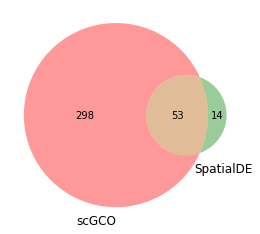

In [7]:
v=venn2(subsets=(set(gco_df.index),set(de_df.g.values)),set_labels=['scGCO','SpatialDE'])
## set labels names
lal=v.get_label_by_id('B')
x_,y_=lal.get_position()
lal.set_position((x_+0.05,y_))
plt.savefig('../figures//Fig2a.pdf')

###  Fig2b

In [8]:
j=11
unary_scale_factor=100
label_cost=10
algorithm='expansion'
ff = '../data/Raw_data/MOB-breast-cancer//Rep' + str(j) +  '_MOB_count_matrix-1.tsv'
locs,data=read_spatial_expression(ff,sep='\t')


data_norm = normalize_count_cellranger(data)
print('Rep{}_processing: {}'.format(j,data_norm.shape))

raw data dim: (262, 16218)
Rep11_processing: (259, 14639)


(351, 2)


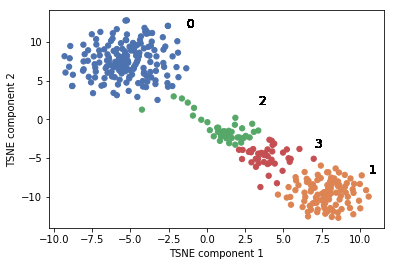

In [12]:
gene_lists=gco_df.index
marker_genes=['Pcp4','Apod','Slc17a7','Glul']
tsne_proj_df=spatial_pca_tsne_kmeans_cluster_gene(data_norm, gene_lists,marker_genes, 
                                                  perplexity = 40) 


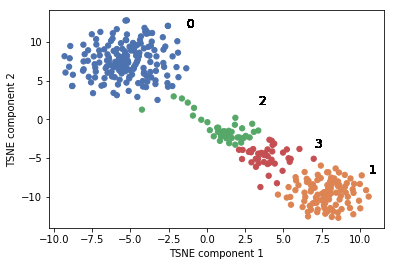

In [13]:
plot_tsne(tsne_proj_df.iloc[:,0:2].values,tsne_proj_df.iloc[:,2],
          fileName='../figures/Fig2b.pdf')

### Fig 2c

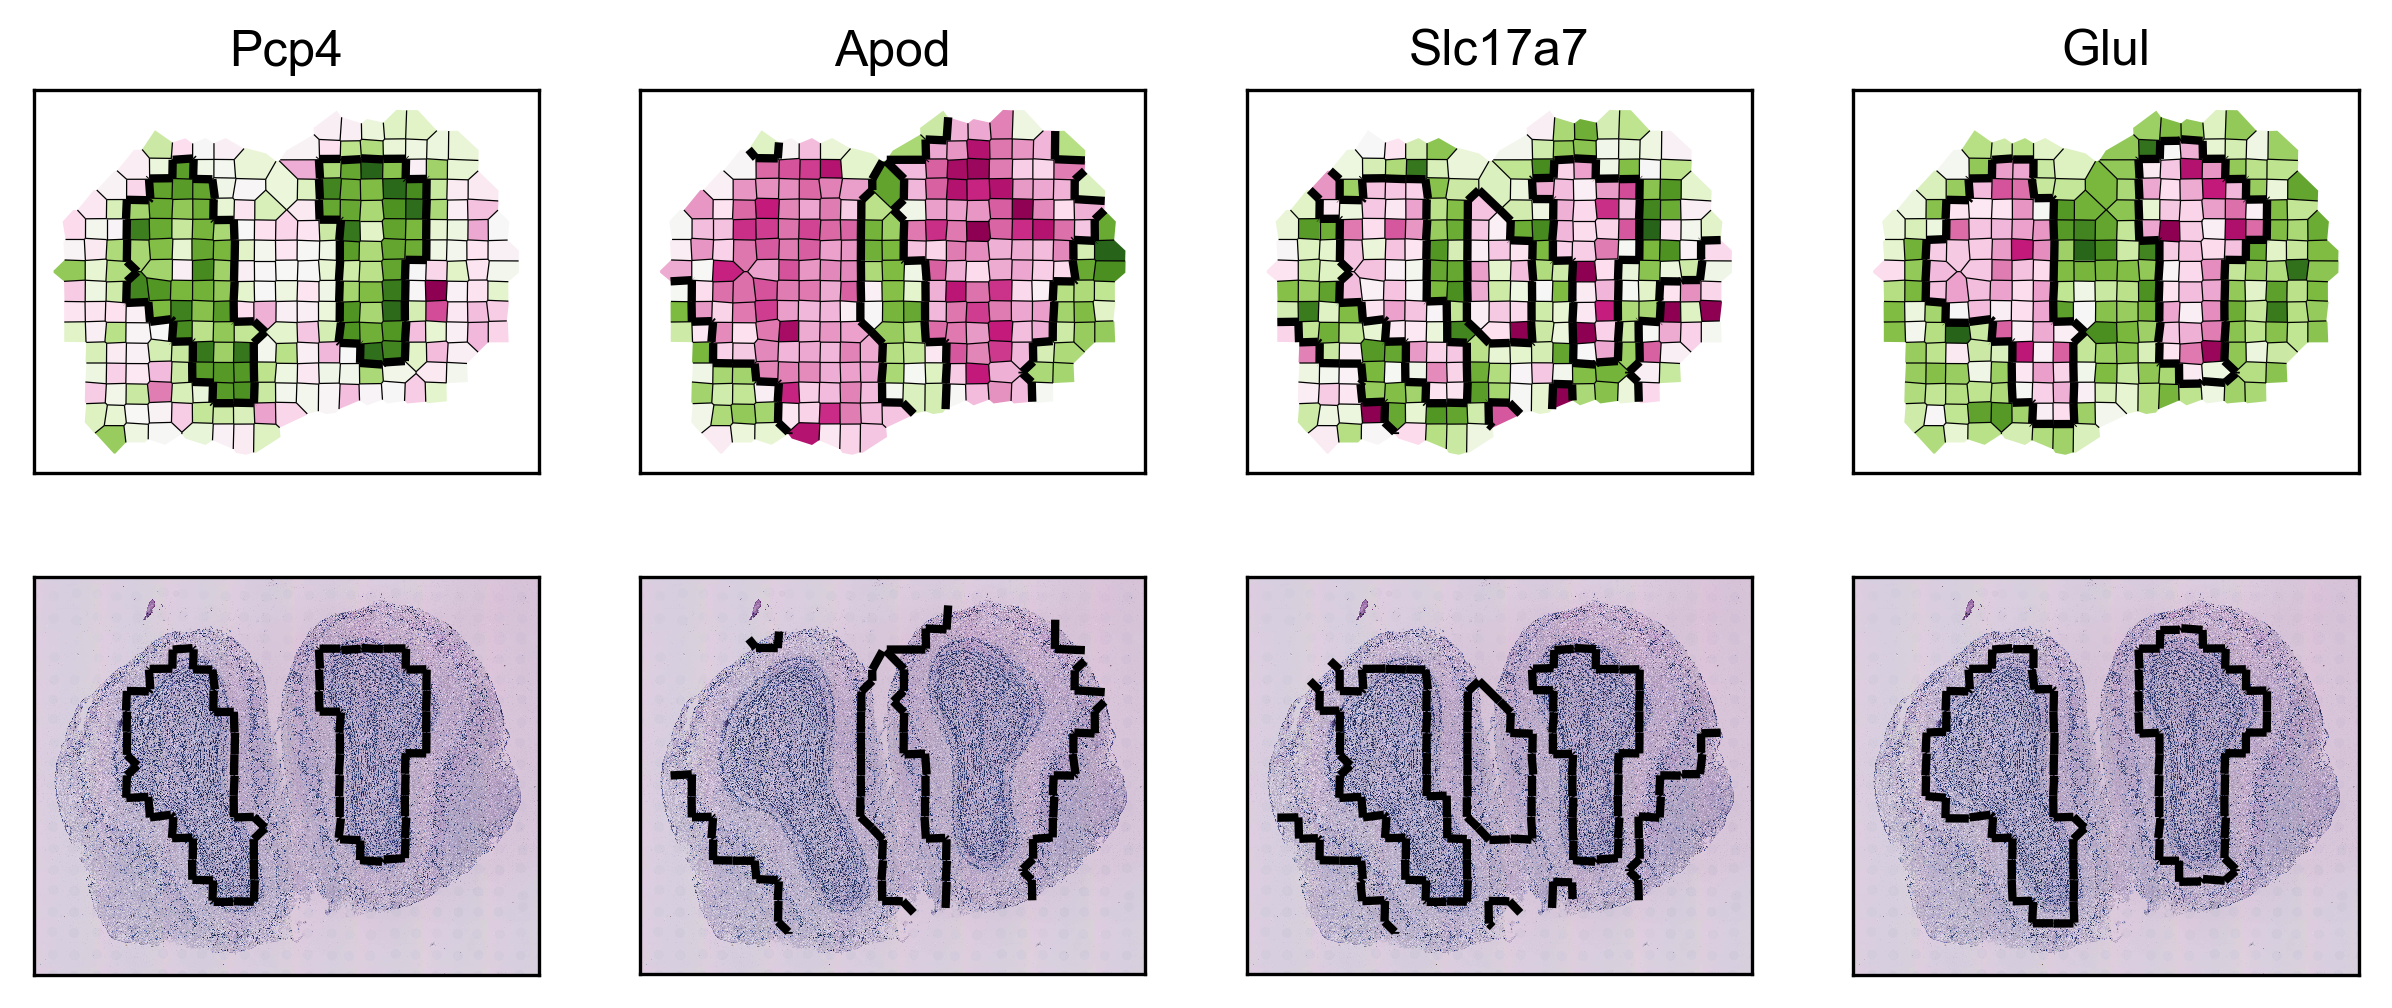

In [14]:
nrows=2
ncols=4
fig,ax=plt.subplots(nrows,ncols,dpi=300,gridspec_kw={"height_ratios":[1,1.15]},figsize=(10,4))

for i,geneID in enumerate(marker_genes):
    exp=data_norm.loc[:,geneID]
    exp=log1p(exp.values)
    newLabels=gco_df.loc[geneID][7:].astype(int)
    p=gco_df.loc[geneID,'fdr']

    
    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=2,
                          line_width=0.3, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])
    
    
    axes=ax[1,i]
    image=("../data/Raw_data//HE-MOB-breast-cancer/HE_Rep11_MOB.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')
    
    axes.set_xticks([],[])
    axes.set_yticks([],[])
    
#fig.tight_layout()

plt.savefig('../figures//Fig2c.pdf')
plt.show()

### Fig 2d

In [15]:
tsne_proj_df.iloc[:3,]

,TSNE1,TSNE2,cluster
geneID,,,
Nrgn,-4.715261,9.353439,0
Sh3pxd2a,7.154407,-10.172664,1
Sparcl1,3.743555,-4.606069,3


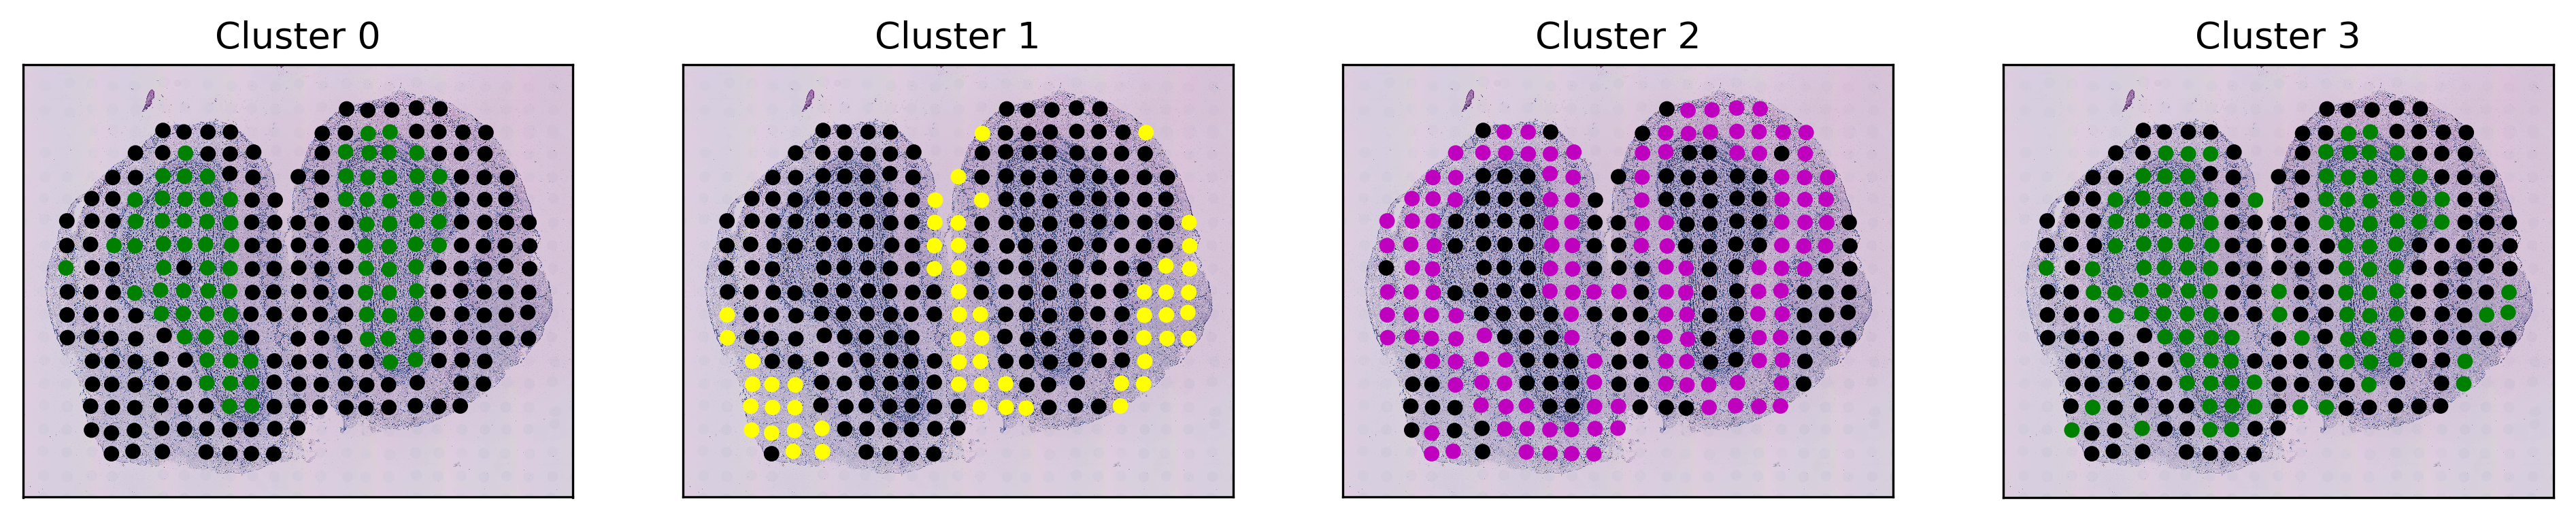

In [18]:
ncols=4
fig,ax=plt.subplots(1,ncols,figsize=(ncols*4,1*4),dpi=300)

for ck,tsne_df in tsne_proj_df.groupby('cluster'):
    geneList=tsne_df.index.values
    KMlables,hmrf_labels=create_labels(locs,data_norm,geneList,
                                       cluster_size=2,unary_scale_factor=100,smooth_factor=20)
    if ck==0:              
        colors=["green",'k'] 
    if ck==1:              
        colors=["k","yellow"] 
    if ck==2:               
        colors=["m","k"]
    if ck==3:                
        colors=["green","k"] 
        
    image='../data/Raw_data/HE-MOB-breast-cancer/HE_Rep11_MOB.jpg'
    axes=ax[ck]
    add_HE_image(image,axes)
    title='Cluster {}'.format(ck)
    subplot_HE_with_labels(locs,hmrf_labels,image,axes,colors,title,s=20,fontsize=13)
    axes.set_xticks([],[])
    axes.set_yticks([],[])
    
plt.savefig('../figures/Fig2d.pdf')
plt.show()    